In [32]:
import numpy as np 
import matplotlib.pyplot as plt
import lin_Fit as lf
import pandas as pd
from lib5 import quad, getV, getM_a, getI_0
from scipy.stats import chi2, norm
from math import e
import sympy as sp
import scipy.integrate as integrate
def mynorm(x, mu, sigma):
    return (1/(np.sqrt(2*np.pi)*sigma**2))*e**(-(x-mu)**2/(2*sigma**2))

# Estrarre $a_i$

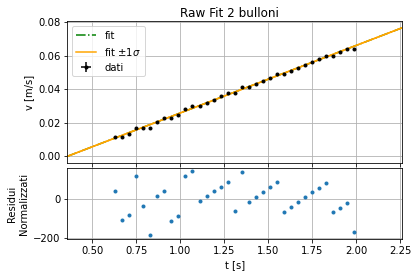

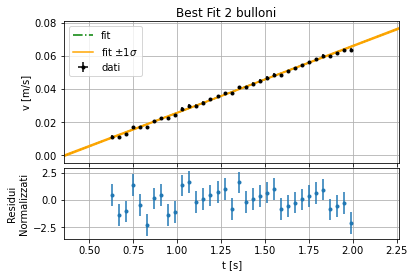

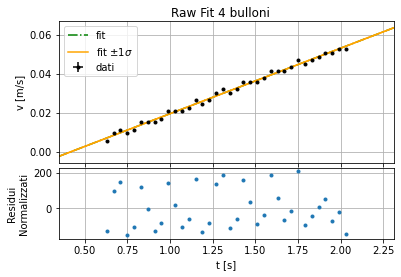

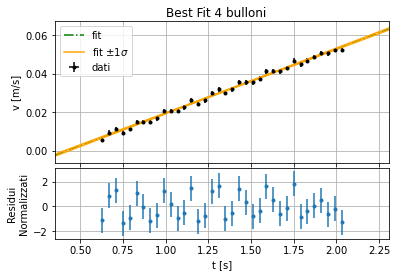

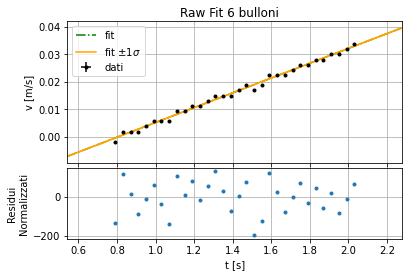

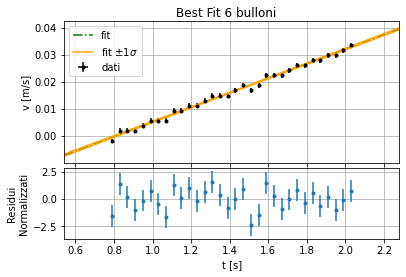

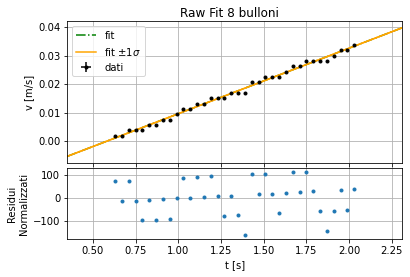

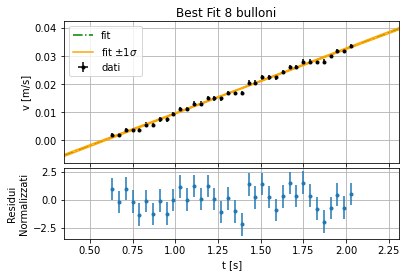

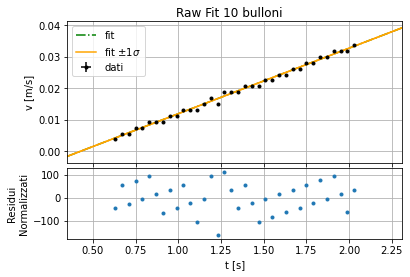

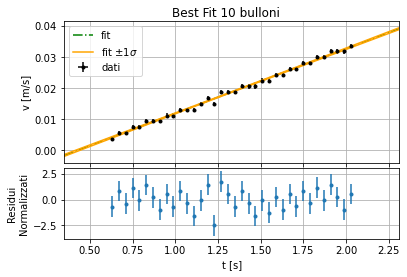

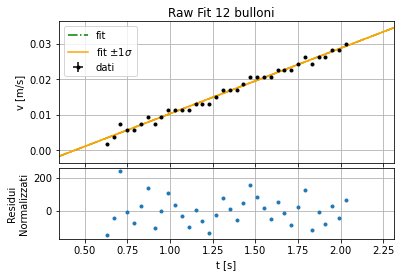

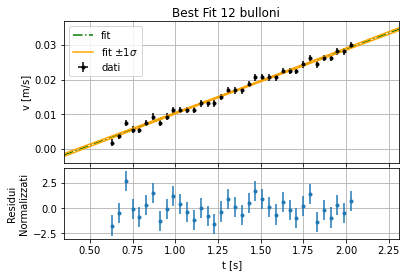

In [33]:
#setup grafici
fig1 = plt.figure(1)
fig2 = plt.figure(2)
ls = ['-','--','-.',':','-','--']

#setup analisi
limits = np.array([[30,30,38,30,30,30], #minimi
                   [100,102,102,102,102,102]]) #massimi
a = np.arange(6.0)
chi2_raw = np.arange(6.0)
chi2_best = np.arange(6.0)
sigma_a = np.arange(6.0)
sigma_x = 0.3*(5*(10**-7))
sigma_t = 0.3*(2*(10**-2))*0
nu = np.arange(6)

#ciclo for
for i in range(6):
    name = 'data/completa'+str(i)+'.txt'
    df = pd.read_csv(name, sep = '\t', skiprows=1)
    t = df['Time (s)'].to_numpy()
    x = df['Position (m)'].to_numpy()
    x = x[limits[0][i]:limits[1][i]]
    t = t[limits[0][i]:limits[1][i]]
    
    n = x.size/2 # numero di punti sperimentali per il fit, n è float
    v = np.arange(n)
    sigma_v = np.arange(n)
    tau = np.arange(n)
    sigma_tau = np.arange(n)
    for j in range(int(n)):
        v[j], sigma_v[j] = getV(x[2*j+1],x[2*j],t[2*j+1],t[2*j], sigma_x, sigma_x, sigma_t, sigma_t) 
        tau[j] = (t[2*j+1]+t[2*j])/2
        sigma_tau[j] = quad(sigma_t, sigma_t)*0.5    
        
    m0 = (v[int(n-1)]-v[0])/(tau[int(n-1)]-tau[0])
    
    a[i], sigma_a[i], c, sigma_c, cov, rho = lf.lin_fit(tau,v, sigma_v, sigma_tau, m0, plot=True, verbose=False, res = True, save = True,
                                                        title='Raw Fit '+str((i+1)*2)+' bulloni', xlabel='t [s]', ylabel='v [m/s]', name='fig5b/rawFit'+str(i)+'.pdf', )
    chi2_raw[i] = np.sum(((v-(a[i]*tau+c))/sigma_v)**2)
    
    sigma_v_new_scalar = np.sqrt(np.sum((v-(a[i]*tau+c))**2)/(n-2))
    sigma_v_new = np.full(int(n), sigma_v_new_scalar)
    
    a[i], sigma_a[i], c, sigma_c, cov, rho = lf.lin_fit(tau,v, sigma_v_new, plot=True, verbose = False, save = True, res=True,
                                                        title='Best Fit '+str((i+1)*2)+' bulloni', xlabel = 't [s]', ylabel='v [m/s]', name='fig5b/bestFit'+str(i)+'.pdf')
    chi2_best[i] = np.sum(((v-(a[i]*tau+c))/sigma_v_new)**2)
    nu[i] = n-2 #numero di gradi di libertà del chi2
    
    # Plottare posizioni e velocità
    plt.figure(fig1.number)
    plt.plot(t,x, label = str((i+1)*2)+' bulloni', ls = ls[i])
    plt.legend()
    plt.grid()
    
    
    plt.figure(2)
    plt.plot(tau,v, label = str((i+1)*2)+' bulloni', ls =ls[i])
    plt.legend()
    plt.grid() 
    
plt.figure(1)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.title('Posizioni misurate')

plt.figure(2)
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')
plt.title('Velocità calcolate')


fig1.savefig('fig5b/posizioni.pdf')
fig2.savefig('fig5b/velocità.pdf')
plt.close(1)
plt.close(2)

In [34]:
matrix1 = np.matrix([a, sigma_a, nu, chi2_raw, chi2_best]) 
result1 = pd.DataFrame(data=matrix1, columns=[2,4,6,8,10,12], index=['a [m/s^2]','$\sigma_a$ [m/s^2]','$\nu$', '$\chi^2$ raw', '$\chi^2$ best'])
result1

,2,4,6,8,10,12
a [m/s^2],0.040270,0.033639,0.027012,0.023027,0.020819,0.018454
$\sigma_a$ [m/s^2],0.000369,0.000491,0.000434,0.000318,0.000277,0.000378
$\nu$,33.000000,34.000000,30.000000,34.000000,34.000000,34.000000
$\chi^2$ raw,228142.507003,452013.620764,219242.576979,190354.193479,143796.921922,268609.234234
$\chi^2$ best,33.000000,34.000000,30.000000,34.000000,34.000000,34.000000


In [35]:

integrate.quad(chi2.pdf,0,20.87,args=[33])


(0.050060009489149064, 1.863466788870335e-11)

Text(0.5, 0.98, 'Risultati del fit')

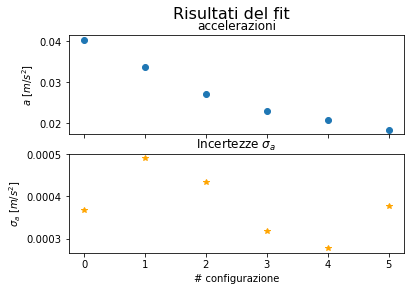

In [36]:
fig3, ax3 = plt.subplots(2, sharex = True)
ax3[0].plot(a, 'o')
ax3[0].set_title('accelerazioni')
ax3[0].set_ylabel('$a~[m/s^2]$')
ax3[1].plot(sigma_a, '*', color = 'orange')
ax3[1].set_title('Incertezze $\sigma_a$',)
ax3[1].set_ylabel('$\sigma_a~[m/s^2]$')
plt.xlabel('# configurazione')
fig3.suptitle('Risultati del fit', fontsize=16)

# Fit $\frac{1}{a}=A+Bn$
Consideriamo la propagazione delle incertezze per la funzione $y=1/a$, 

otteniamo: $\sigma_y=|\frac{\sigma_a}{a^2}|$

P-value Raw Fit: 8.85%
chi2 Raw Fit: 8.08


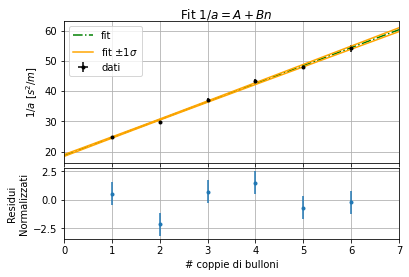

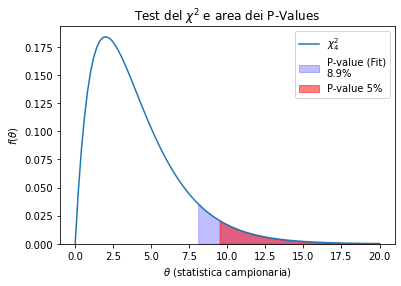

In [37]:
# Raw Fit (chiamo i risultati di questo fit con m1,sigma_m1,c1...)
n = np.array([1,2,3,4,5,6])
y = 1/a
sigma_y = abs(sigma_a/a**2)
m1, sigma_m1, c1, sigma_c1, cov1, rho1 = lf.lin_fit(n,y,sigma_y, res=True,verbose=False, xlabel='# coppie di bulloni', ylabel='$1/a~[s^2/m]$', title='Fit $1/a=A+Bn$', name='fig5b/bulloniRawFit.pdf', save=True)


# Test del chi2
nu = 4
chi2_raw = np.sum(((y-m1*n-c1)/sigma_y)**2)
Pv_raw, trash = integrate.quad(chi2.pdf, chi2_raw, np.inf,args=[nu]) #trash è l'incertezza dovuta all'integrazione

#Poiché il P-Value è basso si decide di stimare a posteriori

# Stima posteriori
#sigma_y_new_scalar = np.sqrt(np.sum((y-(m1*n+c1))**2)/4)
#sigma_y_new = np.full(6, sigma_y_new_scalar)

# Best Fit (chiamo i risultati di questo fit con m2, sigma_m2, c2 ...)
#m2, sigma_m2, c2, sigma_c2, cov2, rho2 = lf.lin_fit(n,y,sigma_y_new, res=True,verbose=True, xlabel='# bulloni', ylabel='$1/a~[s^2/m]$', title='Best Fit $1/a=A+Bn$',name='fig5b/bulloniBestFit.pdf', save=True)
#chi2_best = np.sum(((y-m2*n-c2)/sigma_y_new)**2)
#Pv_best, trash = integrate.quad(chi2.pdf, chi2_best, np.inf,args=[nu])


# Grafico chi2
plt.figure()
x = np.linspace(0,20,100)
plt.plot(x, chi2.pdf(x,df=nu), label = '$ \chi^2_4$')
plt.ylim(0)
plt.title('Test del $\chi^2$ e area dei P-Values')
x_color_raw = np.linspace(chi2_raw, 20, 100)
#x_color_best = np.linspace(chi2_best, 20, 100)
x_color_critic = np.linspace(9.49, 20, 100)
plt.fill_between(x_color_raw, 0, chi2.pdf(x_color_raw, nu), label='P-value (Fit)\n'+"{:.1%}".format(Pv_raw), alpha = 0.25, color = 'blue')
#plt.fill_between(x_color_best, 0, chi2.pdf(x_color_best, nu), label='P-value (Best Fit)\n'+"{:.1%}".format(Pv_best), alpha = 0.5)
plt.fill_between(x_color_critic, 0, chi2.pdf(x_color_critic,nu), label='P-value 5%', color='red', alpha=0.5)
plt.xlabel('$\\theta$ (statistica campionaria)')
plt.ylabel('$f(\\theta)$')
plt.legend()
plt.savefig('fig5b/chi2.pdf')

# stampe
print("P-value Raw Fit: {:.2%}".format(Pv_raw))
#print("P-value Best Fit: {:.2%}".format(Pv_best))
print("chi2 Raw Fit: {:.2f}".format(chi2_raw))
#print("chi2 Best Fit: {:.2f}".format(chi2_best))
#non ho idea di quante cifre significative ci vadano per questi chi2

# Estrapolazione $I_0$ e $M_a$
## Calcoli Preliminari
- Massa singolo bullone
    - Dal momento che non siamo in condzioni di ripetibilità (ogni massa di ogni bullone è diversa), non possiamo usare la deviazione standard campionaria come incertezza sulla singola misura
    - Usiamo allora come incertezza sulla singola misura soltanto $\sigma_b = ris/\sqrt{12}$
    - Poiché l'incertezza sulla media va come $\bar{\sigma}=\frac{\sigma}{\sqrt{N}}$ e $N = 12$, stimiamo l'incertezza sulla massa media del bullone come $ris/12$
- Misura di r (raggio cilindro centrale anche chiamato rocchetto)
    - Si stima $\sigma_d$ come $\sqrt{\left(\frac{S_{N-1}}{\sqrt{N}}\right)^2+\left(\frac{ris}{\sqrt{12}}\right)^2 + \left(\frac{2 \Delta x}{\sqrt{12}}\right)^2}$, dove $\Delta_x$ è l'errore massimo, e $N=6$
    - $\sigma_r = \sigma_d/2$
- Misura di rho
    - E' stata presa con il righello e rappresenta la distanza dal rocchetto al foro
- Misura di r_star
    - E' stata presa con il righello e rappresenta la distanza dal rocchetto al bordo del volano
- Misura di Rv
    - Si definisce come $r+r^*$, equivale al raggio vero del volano 
- Misura di R (centro del volano-centro di massa del bullone)
    - Si stima R come $R=r+\rho+\frac{d_f}{2}$r, dove $\rho$ è la distanza la cilindro centrale al foro, mentre $d_f$ è il diametro del foro
- Misura di V
    - Si considera il disco di alluminio con densità 2.70 g/cm^3, ovvero 0.0027 g/mm^3
    - La distanza r_star (Rv-r) è quella dal cilindro centrale fino al bordo del disco e vale 186 mm
    - Rv è il vero raggio del disco e vale r+r_star. Serve soltanto per il calcolo del volume
    - s è lo spessore del disco, è stato misurato con il Nonio e quindi lo trattiamo come tale
- Misura di m_disco
    - Si assume che il disco sia un oggetto di densità uniforme in alluminio, la densità dell'alluminio è presa come $2.70~g/cm^3$
- Misura di m (la massetta appesa)
    - La sua incertezza è solo di tipo B e vale $\sqrt{\left(\frac{ris}{\sqrt{12}}\right)^2 + \left(\frac{2 \Delta x}{\sqrt{12}}\right)^2}$, dove $\Delta x$ è l'errore massimo dello strumento che vale $0.1g$

In [38]:
# Misura massa singolo bullone
df1 = pd.read_csv('csv/data - 2.csv')
masse = df1['m(b)'].to_numpy()
conf = np.array([1,4,7,8,9,10,13,14,15,16,18,19])
mtot = 0
for i in range(12):
    mtot += masse[conf[i]-1]
m_b = (mtot/12)/1000 #kg
sigma_m_b = 0.1/12/1000 #kg

# Misura r
d = np.array([21.40,21.30,21.25,21.40,21.25])/1000#m
sigma_d = quad(np.std(d,ddof= 1)/np.sqrt(d.size), 0.00005/np.sqrt(12), (0.00004*2)/np.sqrt(12)) #sigma_b è data dalla somma in quadratura di ris/radical(12) e 2err/radical(12)
r = np.mean(d)/2
sigma_r = sigma_d/2

# Misura R
rho = 160/1000 #m
d_f = 12.00/1000 #m
r_f = d_f/2 #m
sigma_rho = 0.001/np.sqrt(12) #m
sigma_d_f = quad(0.00005/np.sqrt(12),(0.00004*2)/np.sqrt(12)) #di fatto è uguale a sigma_d, ma non ci sono le incertezze di tipo A
sigma_r_f = sigma_d_f/2
R = r+rho+(d_f/2)
sigma_R = quad(sigma_r, sigma_rho, sigma_r_f)

#Misura di V
r_star = 186/1000 #m
sigma_r_star = 0.001/np.sqrt(12) #m
Rv = r + r_star
sigma_Rv = quad(sigma_r, sigma_r_star)
s_arr = np.array([2.1,2.1,2.1])/1000 # in realtà l'ultimo sarebbe 2.6
sigma_s = quad(np.std(s_arr,ddof= 1), 0.00005/np.sqrt(12),(0.00004*2)/np.sqrt(12))
s = np.mean(s_arr)
V = (s*Rv*Rv*np.pi)-14*(s*r_f*r_f*np.pi) #m^3
sigma_V = quad(np.pi*(Rv**2-12*r_f**2)*sigma_s,
              2*np.pi*s*Rv*sigma_Rv,
              24*s*np.pi*r_f*sigma_r_f) #m^3

m_disco = V*(2.7*1000) #kg (densità alluminio in kg/m^3) 
sigma_m_disco  = sigma_V*(2.700*1000) #kg

# massa (pesetto appeso)
m = 559.3/1000 #kg
sigma_m = quad(0.1/np.sqrt(12),(0.1*2)/np.sqrt(12))/1000 #Kg

# Stampe
print("m_b: {:.4f} [g]".format(m_b*1000), "sigma_m_b: {:.2g} [g]".format(sigma_m_b*1000), "nu: {:.2%}".format(sigma_m_b/m_b), sep = '\t', end = ' <--\n')
print("r: {:.2f} [mm]".format(r*1000), "sigma_r: {:.2g} [mm]".format(sigma_r*1000), "nu: {:.2%}".format(sigma_r/r), sep = '   \t', end = ' <--\n')
print("rho: {:.2f} [mm]".format(rho*1000), "sigma_rho: {:.2g} [mm]".format(sigma_rho*1000), "nu: {:.2%}".format(sigma_rho/rho), sep = '   \t')
print("r_f: {:.3f} [mm]".format(d_f/2*1000), "sigma_r_f: {:.2g} [mm]".format(sigma_r_f*1000), "nu: {:.2%}".format(sigma_r_f/r_f), sep = '  \t')
print("R: {:.2f} [mm]".format(R*1000), "sigma_R: {:.2g} [mm]".format(sigma_R*1000), "nu: {:.2%}".format(sigma_R/R), sep = '   \t', end = ' <--\n')
print("r_star: {:.2f} [mm]".format(r_star*1000), "sigma_r_star: {:.2g} [mm]".format(sigma_r_star*1000), "nu: {:.2%}".format(sigma_r_star/r_star), sep = '\t')
print("Rv: {:.2f} [mm]".format(Rv*1000), "sigma_Rv: {:.2g} [mm]".format(sigma_Rv*1000), "nu: {:.2%}".format(sigma_Rv/Rv), sep = '   \t')
print("s: {:.3f} [mm]".format(s*1000), "sigma_s: {:.2g} [mm]".format(sigma_s*1000), "nu: {:.2%}".format(sigma_s/s), sep = '    \t')
print("V: {:.0f} [cm^3]".format(V*10**6), "sigma_V: {:.2g} [cm^3]".format(sigma_V*10**6), "nu: {:.2%}".format(sigma_V/V), sep = '   \t')
print("m_disco: {:.0f} [g]".format(m_disco*1000), "sigma_m_disco: {:.2g} [g]".format(sigma_m_disco*1000), "nu: {:.2%}".format(sigma_m_disco/m_disco), sep = '\t')
print("m: {:.2f} [g]  ".format(m*1000), "sigma_m: {:.1g} [g]".format(sigma_m*1000), "nu: {:.2%}".format(sigma_m/m), sep = '     \t', end = ' <--\n')

m_b: 53.5167 [g]	sigma_m_b: 0.0083 [g]	nu: 0.02% <--
r: 10.66 [mm]   	sigma_r: 0.022 [mm]   	nu: 0.20% <--
rho: 160.00 [mm]   	sigma_rho: 0.29 [mm]   	nu: 0.18%
r_f: 6.000 [mm]  	sigma_r_f: 0.014 [mm]  	nu: 0.23%
R: 176.66 [mm]   	sigma_R: 0.29 [mm]   	nu: 0.16% <--
r_star: 186.00 [mm]	sigma_r_star: 0.29 [mm]	nu: 0.16%
Rv: 196.66 [mm]   	sigma_Rv: 0.29 [mm]   	nu: 0.15%
s: 2.100 [mm]    	sigma_s: 0.027 [mm]    	nu: 1.30%
V: 252 [cm^3]   	sigma_V: 3.4 [cm^3]   	nu: 1.33%
m_disco: 680 [g]	sigma_m_disco: 9.1 [g]	nu: 1.33%
m: 559.30 [g]       	sigma_m: 0.06 [g]     	nu: 0.01% <--


## Metodo Analitico

In [48]:
A = c1
B = m1
sigma_A = sigma_c1
sigma_B = sigma_m1
cov_A_B = cov1
M_a, sigma_M_a, M_a_latex, sigma_M_a_latex = getM_a(m,m_b,r,rho,r_f,B,sigma_m,sigma_m_b,sigma_r,sigma_rho,sigma_r_f,sigma_B)
I_0, sigma_I_0, I_0_latex, sigma_I_0_latex = getI_0(m_b,r,rho,r_f,A,B,m,sigma_m_b,sigma_r,sigma_rho,sigma_r_f,sigma_A,sigma_B,sigma_m,cov_A_B)

# Stampe
print("M_a: {:.4f} [Nm]".format(M_a), "sigma_M_a: {:.2g} [Nm]".format(sigma_M_a), "nu: {:.2%}".format(abs(sigma_M_a/M_a)), sep = '    \t')
print("I_0: {:.5f} [Nm]".format(I_0), "sigma_I_0: {:.2g} [Nm]".format(sigma_I_0), "nu: {:.2%}".format(abs(sigma_I_0/I_0)), sep = '    \t')


0.000365442473936628
M_a: 0.0057 [Nm]    	sigma_M_a: 0.0011 [Nm]    	nu: 19.50%
I_0: 0.01049 [Nm]    	sigma_I_0: 0.00037 [Nm]    	nu: 3.48%


## Simulazione

In [49]:
#Questa parte serve a me per scrivere il codice
var = ['m', 'r', 'm_b', 'rho', 'r_f', 'B']
for i in var:
    #print(i+'_rand'+' = np.random.normal('+i+',sigma_'+i+',M)')
    print(i, end=',')

m,r,m_b,rho,r_f,B,

Si generano 100000 valori casuali di $m,r,m_b,rho,r_f,B,A$, poi si calcola $M_a$ e $I_0$. Per ognuno dei due, si calcola la media e la deviazione standard campionaria, che si associano rispettivamente a valore atteso e incertezza di $M_a$ e $I_0$. La validità di queste simulazioni sta nel fatto che:

- $E[\bar{X}]=\mu$
- $\sigma[\bar{X}] = \frac{\sigma}{\sqrt{N}}$
- $E[S_{N-1}] = \sigma$
- $\sigma[S_{N-1}] = \frac{\sigma}{\sqrt{2(N-1)}}$

M_a_sim: 0.0057 [Nm]	sigma_M_a_sim: 0.0011 [Nm]
I_0_sim: 0.01050 [Nm]	sigma_I_0_sim: 0.00028 [Nm]


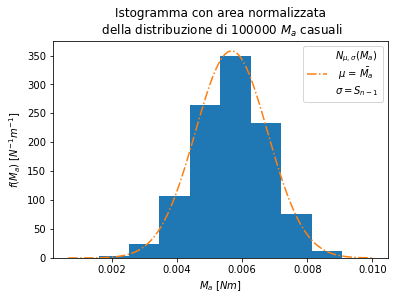

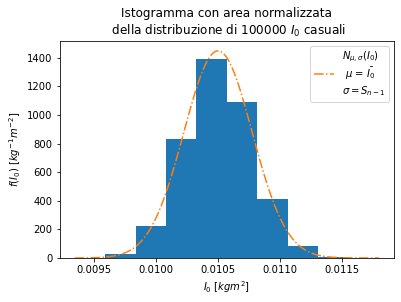

In [54]:
M = 100000
#M_a
m_rand = np.random.normal(m,sigma_m,M)
r_rand = np.random.normal(r,sigma_r,M)
m_b_rand = np.random.normal(m_b,sigma_m_b,M)
rho_rand = np.random.normal(rho,sigma_rho,M)
r_f_rand = np.random.normal(r_f,sigma_r_f,M)
B_rand = np.random.normal(B,sigma_B,M)

M_a_rand = m_rand*9.805*r_rand-(2*m_b_rand*(r_rand+rho_rand+r_f_rand)**2)/(B_rand*r_rand)
M_a_sim = np.mean(M_a_rand)
sigma_M_a_sim = np.std(M_a_rand,ddof=1)

#I_0
A_rand = np.random.normal(A,sigma_A,M)
I_0_rand = I_0 = 2*m_b_rand*((r_rand+rho_rand+r_f_rand)**2)*(A_rand/B_rand) - m_rand*(r_rand**2) 
I_0_sim = np.mean(I_0_rand)
sigma_I_0_sim = np.std(I_0_rand, ddof=1)


# plot M_a
plt.figure()
x = np.linspace(M_a_rand.min(),M_a_rand.max(),100)
plt.hist(M_a_rand, density = True, label = '')
plt.plot(x, norm.pdf(x,M_a_sim,sigma_M_a_sim), '-.', label = '$N_{\mu,\sigma}(M_a)$ \n $\mu$ = $\\bar{M_a}$\n$\sigma = S_{n-1}$')
plt.title('Istogramma con area normalizzata\n della distribuzione di '+str(M)+' $M_a$ casuali')
plt.xlabel('$M_a~[Nm]$')
plt.ylabel('$f(M_a)~[N^{-1}m^{-1}]$')
plt.legend()
plt.savefig('fig5b/simM_a.pdf')

#plot I_0
plt.figure()
x = np.linspace(I_0_rand.min(),I_0_rand.max(),100)
plt.hist(I_0_rand, density = True)
plt.plot(x, norm.pdf(x,I_0_sim,sigma_I_0_sim), '-.', label = '$N_{\mu,\sigma}(I_0)$ \n $\mu$ = $\\bar{I_0}$\n$\sigma = S_{n-1}$')
plt.title('Istogramma con area normalizzata\n della distribuzione di '+str(M)+' $I_0$ casuali')
plt.xlabel('$I_0~[kgm^2]$')
plt.ylabel('$f(I_0)~[kg^{-1}m^{-2}]$')
plt.legend()
plt.savefig('fig5b/simI_0.pdf')



# Stampe
print("M_a_sim: {:.4f} [Nm]".format(M_a_sim), "sigma_M_a_sim: {:.2g} [Nm]".format(sigma_M_a_sim), sep = '\t')
print("I_0_sim: {:.5f} [Nm]".format(I_0_sim), "sigma_I_0_sim: {:.2g} [Nm]".format(sigma_I_0_sim), sep = '\t')

# Studio incertezze

## Studio incertezza $M_a$

In [42]:
var = ['m','m_b','r','r_star','r_f','B']
for i in var:
    #print(''+str(i), end = ',')
    #print('sp.diff(_M_a,_'+str(i)+')*_sigma_'+str(i), end=',\n')
    print('(_sigma_{},sigma_{})'.format(i,i),end=',')

(_sigma_m,sigma_m),(_sigma_m_b,sigma_m_b),(_sigma_r,sigma_r),(_sigma_r_star,sigma_r_star),(_sigma_r_f,sigma_r_f),(_sigma_B,sigma_B),

In [43]:
def getM_a(m,m_b,r,rho,r_f,B,sigma_m,sigma_m_b,sigma_r,sigma_rho,sigma_r_f,sigma_B):
    _g = sp.Symbol('g')
    _m,_m_b,_r,_rho,_r_f,_B = sp.symbols('m,m_b,r,rho,r_f,B')
    _sigma_m,_sigma_m_b,_sigma_r,_sigma_rho,_sigma_r_f,_sigma_B = sp.symbols('sigma_m,sigma_m_b,sigma_r,sigma_rho,sigma_r_f,sigma_B')
    _M_a,_sigma_M_a = sp.symbols('M_a, sigma_M_a')
    _M_a = _m*_g*_r-(2*_m_b*(_r+_rho+_r_f)**2)/(_B*_r)
    _sigma_M_a = quad(sp.diff(_M_a,_m)*_sigma_m,
                        sp.diff(_M_a,_m_b)*_sigma_m_b,
                        sp.diff(_M_a,_r)*_sigma_r,
                        sp.diff(_M_a,_rho)*_sigma_rho,
                        sp.diff(_M_a,_B)*_sigma_B,
                        sp.diff(_M_a,_r_f)*_sigma_r_f)
    M_a = _M_a.subs([(_m,m),(_m_b,m_b),(_r,r),(_rho,rho),(_B,B),(_r_f, r_f),(_g,9.805)])
    sigma_M_a = _sigma_M_a.subs([(_m,m),(_m_b,m_b),(_r,r),(_rho,rho),(_B,B),(_r_f, r_f),(_g,9.805),
                                 (_sigma_m,sigma_m),(_sigma_m_b,sigma_m_b),(_sigma_r,sigma_r),(_sigma_rho,sigma_rho),(_sigma_r_f,sigma_r_f),(_sigma_B,sigma_B)])

    M_a = float(M_a)
    sigma_M_a = float(sigma_M_a)
    latex1 = sp.latex(_M_a)
    latex2 = sp.latex(_sigma_M_a)
    return M_a, sigma_M_a, latex1, latex2


## Studio incertezza $I_0$

In [44]:
var = ['m_b','r','rho','r_f','A', 'B','m']
for i in var:
    #print('sigma_'+str(i), end=',' )
    print("({},{})".format('_'+i,i),"({},{})".format('_sigma_'+i,'sigma_'+i),sep = ',' , end=',')
    #print("sp.diff(_I_0,{})*_sigma_{}".format('_'+i,i),sep = '' , end=',\n')


(_m_b,m_b),(_sigma_m_b,sigma_m_b),(_r,r),(_sigma_r,sigma_r),(_rho,rho),(_sigma_rho,sigma_rho),(_r_f,r_f),(_sigma_r_f,sigma_r_f),(_A,A),(_sigma_A,sigma_A),(_B,B),(_sigma_B,sigma_B),(_m,m),(_sigma_m,sigma_m),

In [45]:
def getI_0(m_b,r,rho,r_f,A,B,m,sigma_m_b,sigma_r,sigma_rho,sigma_r_f,sigma_A,sigma_B,sigma_m,cov_A_B):
    _cov_A_B = sp.Symbol('Cov[A,B]')
    _m_b,_r,_rho,_r_f,_A,_B,_m = sp.symbols('m_b,r,rho,r_f,A,B,m')
    _sigma_m_b,_sigma_r,_sigma_rho,_sigma_r_f,_sigma_A,_sigma_B,_sigma_m = sp.symbols('sigma_m_b,sigma_r,sigma_rho,sigma_r_f,sigma_A,sigma_B,sigma_m')
    _I_0 = 2*_m_b*((_r+_rho+_r_f)**2)*(_A/_B) - m*(r**2)
    _sigma_I_0 = quad(sp.diff(_I_0,_m_b)*_sigma_m_b,
                        sp.diff(_I_0,_r)*_sigma_r,
                        sp.diff(_I_0,_rho)*_sigma_rho,
                        sp.diff(_I_0,_r_f)*_sigma_r_f,
                        sp.diff(_I_0,_A)*_sigma_A,
                        sp.diff(_I_0,_B)*_sigma_B,
                        sp.diff(_I_0,_m)*_sigma_m, root = False)+2*sp.diff(_I_0,_A)*sp.diff(_I_0,_B)*_cov_A_B
    _sigma_I_0 = _sigma_I_0**0.5

    I_0 = _I_0.subs([(_m_b,m_b),(_r,r),(_rho,rho),(_r_f,r_f),(_A,A),(_B,B),(_m,m),])
    sigma_I_0 = _sigma_I_0.subs([(_m_b,m_b),(_sigma_m_b,sigma_m_b),(_r,r),(_sigma_r,sigma_r),(_rho,rho),(_sigma_rho,sigma_rho),
                                 (_r_f,r_f),(_sigma_r_f,sigma_r_f),(_A,A),(_sigma_A,sigma_A),(_B,B),(_sigma_B,sigma_B),(_m,m),
                                 (_sigma_m,sigma_m),(_cov_A_B, cov_A_B)])
    print(sigma_I_0)
    I_0 = float(I_0)
    sigma_I_0 = float(sigma_I_0)
    latex1 = sp.latex(_I_0)
    latex2 = sp.latex(_sigma_I_0)
    return I_0, sigma_I_0, latex1, latex2

In [46]:
x = np.linspace(0,100,500)
for i in range(6):
    plt.plot(x, chi2.pdf(x,nu[i]), label='\\nu= '+str(nu[i]))
    plt.legend()    
#plt.savefig('chi2.png')

TypeError: 'int' object is not subscriptable

In [ ]:
(0.5*0.681*(0.196)**2)-(12*(0.053)*(0.006)**2)